In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("fybscit_ruparel.csv")
df

,marks,year,caste,list,cutoff,result
0,81,2021,NT-D,1st,44.0,1.0
1,42,2021,NT-C,1st,77.0,0.0
2,65,2021,VJ-A,1st,81.0,0.0
3,71,2021,VJ-A,1st,81.0,0.0
4,97,2021,SBC,1st,76.0,1.0
...,...,...,...,...,...,...
5994,99,2019,OBC,3rd,47.0,1.0
5995,51,2019,NT-C,3rd,35.0,1.0
5996,82,2019,SBC,3rd,49.0,1.0
5997,39,2019,VJ-A,3rd,47.0,0.0


In [3]:
df.dropna(inplace=True)

In [4]:
df.drop(columns=['cutoff'],inplace=True)

In [5]:
fst_df = df[df['list']=='1st']
snd_df = df[df['list']=='2nd']
trd_df = df[df['list']=='3rd']

In [6]:
fst_df = fst_df.sample(fst_df.shape[0])
snd_df = snd_df.sample(snd_df.shape[0])
trd_df = trd_df.sample(trd_df.shape[0])

In [7]:
fst_df.sample(2)

,marks,year,caste,list,result
2516,97,2020,OBC,1st,1.0
667,45,2021,NT-D,1st,1.0


In [8]:
fst_df.drop(columns=['year','list'],inplace=True)
snd_df.drop(columns=['year','list'],inplace=True)
trd_df.drop(columns=['year','list'],inplace=True)

In [9]:
fst_df['result'] = fst_df['result'].astype(int)
snd_df['result'] = snd_df['result'].astype(int)
trd_df['result'] = trd_df['result'].astype(int)

In [10]:
x1 = fst_df.drop(columns=['result'])
y1 = fst_df['result']
x2 = snd_df.drop(columns=['result'])
y2 = snd_df['result']
x3 = trd_df.drop(columns=['result'])
y3 = trd_df['result']

In [11]:
from sklearn.model_selection import train_test_split
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x1,y1,test_size=0.2,random_state=0)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x2,y2,test_size=0.2,random_state=0)
x_train_3,x_test_3,y_train_3,y_test_3 = train_test_split(x3,y3,test_size=0.2,random_state=0)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [13]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['caste'])
]
,remainder='passthrough')

In [14]:
pipe1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression())
])
pipe2 = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression())
])
pipe3 = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression())
])

In [15]:
pipe1.fit(x_train_1,y_train_1)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['caste'])])),
                ('step2', LogisticRegression())])

In [16]:
pipe2.fit(x_train_2,y_train_2)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['caste'])])),
                ('step2', LogisticRegression())])

In [17]:
pipe3.fit(x_train_3,y_train_3)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['caste'])])),
                ('step2', LogisticRegression())])

In [18]:
def predict_admission(marks,caste):
    proba1 = pipe1.predict_proba(pd.DataFrame({'marks':[marks],'caste':[caste]}))
    proba2 = pipe2.predict_proba(pd.DataFrame({'marks':[marks],'caste':[caste]}))
    proba3 = pipe3.predict_proba(pd.DataFrame({'marks':[marks],'caste':[caste]}))
    get_per1 = proba1[0][1]
    get_per2 = proba2[0][1]
    get_per3 = proba3[0][1]
    x = 'Chances for getting admission in 1st cut-off is {} %'.format(get_per1*100)
    y = 'Chances for getting admission in 1st cut-off is {} %'.format(get_per2*100)
    z = 'Chances for getting admission in 1st cut-off is {} %'.format(get_per3*100)
    return x,y,z

In [19]:
predict_admission(92,'Open')

('Chances for getting admission in 1st cut-off is 93.003847822541 %',
 'Chances for getting admission in 1st cut-off is 96.81969906928819 %',
 'Chances for getting admission in 1st cut-off is 99.74374450265131 %')

In [20]:
import pickle

In [21]:
pickle.dump(pipe1,open('pipe1.pkl','wb'))
pickle.dump(pipe2,open('pipe2.pkl','wb'))
pickle.dump(pipe3,open('pipe3.pkl','wb'))

In [22]:
df['caste'].unique()

array(['NT-D', 'NT-C', 'VJ-A', 'SBC', 'SC', 'Open', 'NT-B', 'ST', 'OBC',
       'SEBC', 'EBC'], dtype=object)

In [23]:
df = pd.read_csv("fybscit_ruparel.csv")
df.head()

,marks,year,caste,list,cutoff,result
0,81,2021,NT-D,1st,44.0,1.0
1,42,2021,NT-C,1st,77.0,0.0
2,65,2021,VJ-A,1st,81.0,0.0
3,71,2021,VJ-A,1st,81.0,0.0
4,97,2021,SBC,1st,76.0,1.0


In [24]:
df.dropna(inplace=True)

In [25]:
df['cutoff'] = df['cutoff'].astype(int)

In [26]:
df

,marks,year,caste,list,cutoff,result
0,81,2021,NT-D,1st,44,1.0
1,42,2021,NT-C,1st,77,0.0
2,65,2021,VJ-A,1st,81,0.0
3,71,2021,VJ-A,1st,81,0.0
4,97,2021,SBC,1st,76,1.0
...,...,...,...,...,...,...
5994,99,2019,OBC,3rd,47,1.0
5995,51,2019,NT-C,3rd,35,1.0
5996,82,2019,SBC,3rd,49,1.0
5997,39,2019,VJ-A,3rd,47,0.0


In [31]:
def graph_plot(year):
    new_df = df[df['year']==year]
    new_df.dropna(inplace=True)
    new_df['cutoff'] = df['cutoff'].astype(int)
    graph_df = new_df.groupby(['caste','list']).max()['cutoff'].reset_index()
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.set_palette('Blues')
    d = sns.barplot(x='caste',y='cutoff',data=graph_df,hue='list',ax=ax)
    show_values(d)

C:\Users\sunil\AppData\Local\Temp\ipykernel_3104\108663554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)
C:\Users\sunil\AppData\Local\Temp\ipykernel_3104\108663554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cutoff'] = df['cutoff'].astype(int)


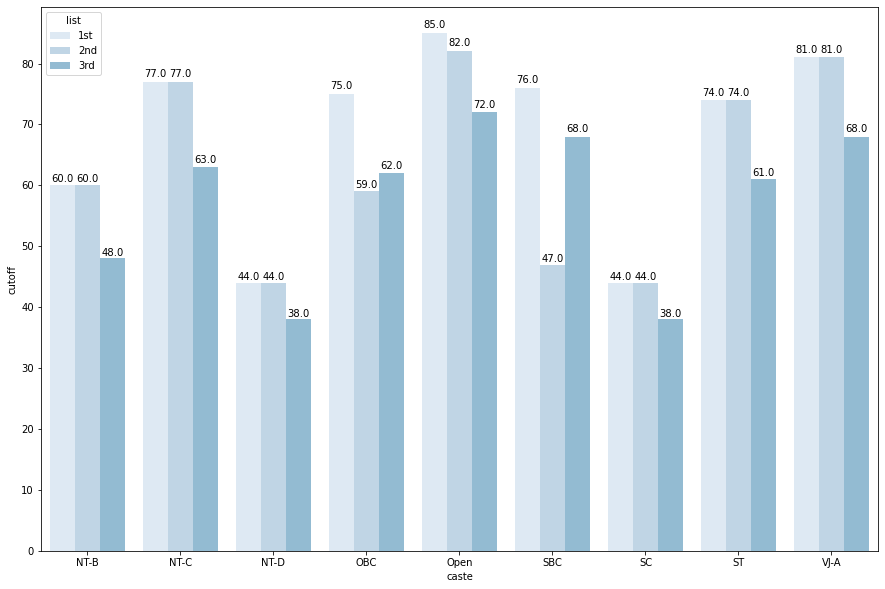

In [32]:
graph_plot(2021)

In [33]:
to_df = df[df['year']==2021]
to_df

,marks,year,caste,list,cutoff,result
0,81,2021,NT-D,1st,44,1.0
1,42,2021,NT-C,1st,77,0.0
2,65,2021,VJ-A,1st,81,0.0
3,71,2021,VJ-A,1st,81,0.0
4,97,2021,SBC,1st,76,1.0
...,...,...,...,...,...,...
1993,77,2021,NT-C,3rd,63,1.0
1994,37,2021,ST,3rd,61,0.0
1995,92,2021,VJ-A,3rd,68,1.0
1996,70,2021,SC,3rd,38,1.0


In [36]:
x2021 = to_df.groupby(['caste','list']).max()['cutoff'].reset_index()
x2021

,caste,list,cutoff
0,NT-B,1st,60
1,NT-B,2nd,60
2,NT-B,3rd,48
3,NT-C,1st,77
4,NT-C,2nd,77
5,NT-C,3rd,63
6,NT-D,1st,44
7,NT-D,2nd,44
8,NT-D,3rd,38
9,OBC,1st,75


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [37]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

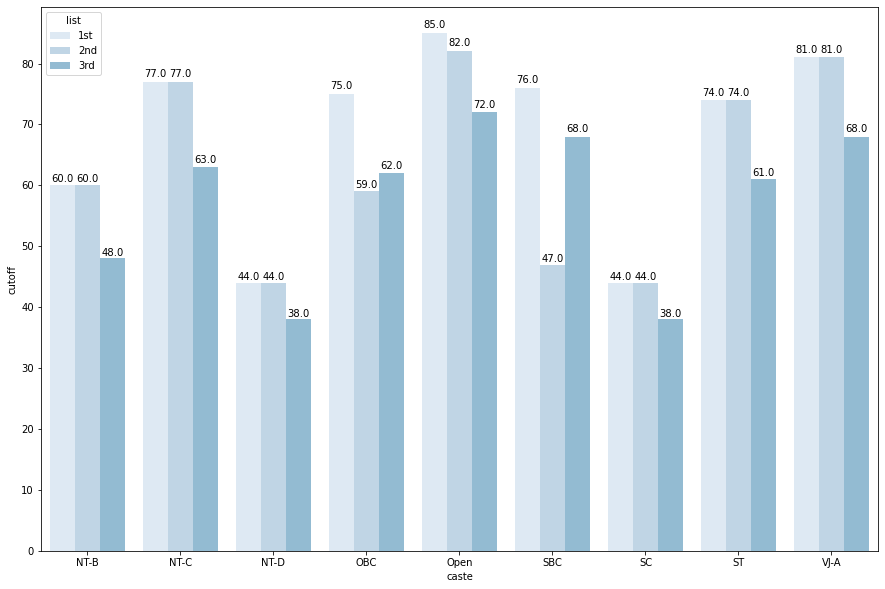

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_palette('Blues')
d = sns.barplot(x='caste',y='cutoff',data=x2021,hue='list',ax=ax)
show_values(d)